## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Hierarchical Agglomerative Clustering - Demo 2

* Alguns problemas dos algoritmos.
* Base de dados sintéticas
* Algumas vantagens em relação ao K-means

In [4]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=1500, 
                  cluster_std=[1.0, 2.5, 0.5],
                  centers=3, n_features=2,
                  random_state=170)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,-6.111197,1.471531,1
1,-7.496654,0.913425,1
2,-10.844898,-7.553523,0
3,-4.543377,-2.135686,1
4,-1.913821,-0.034780,1


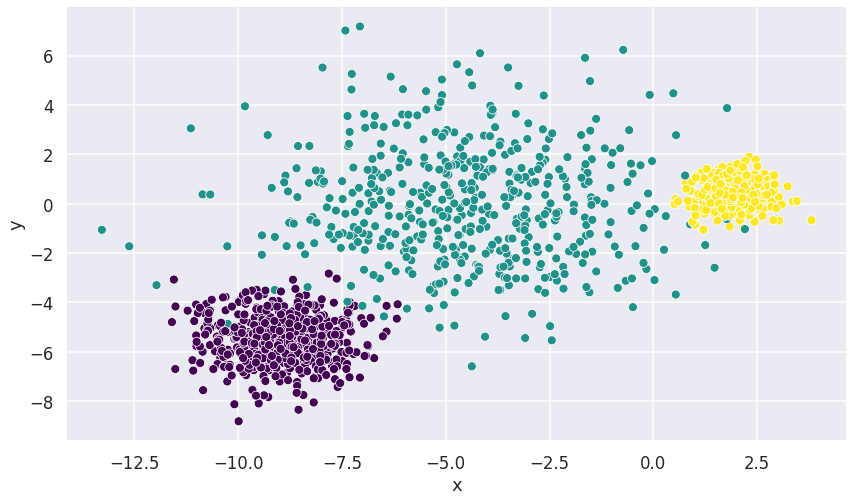

In [5]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='viridis', legend=False)

In [6]:
def train_and_plot(data, method='single', metric='euclidean', threshold=2.0, pallete='viridis'):
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    linkage_matrix = linkage(data_copy, method=method, metric=metric)
    labels = fcluster(linkage_matrix, threshold, 'distance')
    
    data_copy['cluster_labels'] = labels
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette=pallete, legend=False)
    
    return data_copy['cluster_labels']

### Single Linkage

Clusters: 2


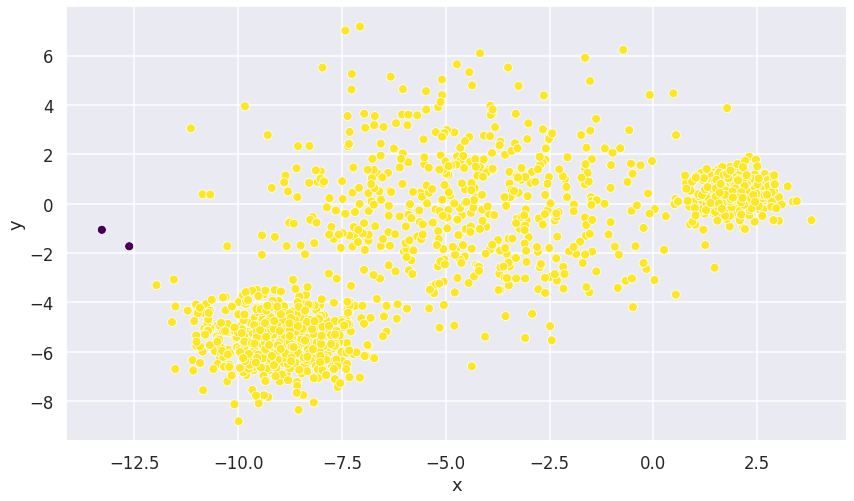

In [7]:
labels = train_and_plot(df, method='single', threshold=1.7)
print('Clusters:', len(np.unique(labels)))

### Complete Linkage

Clusters: 3


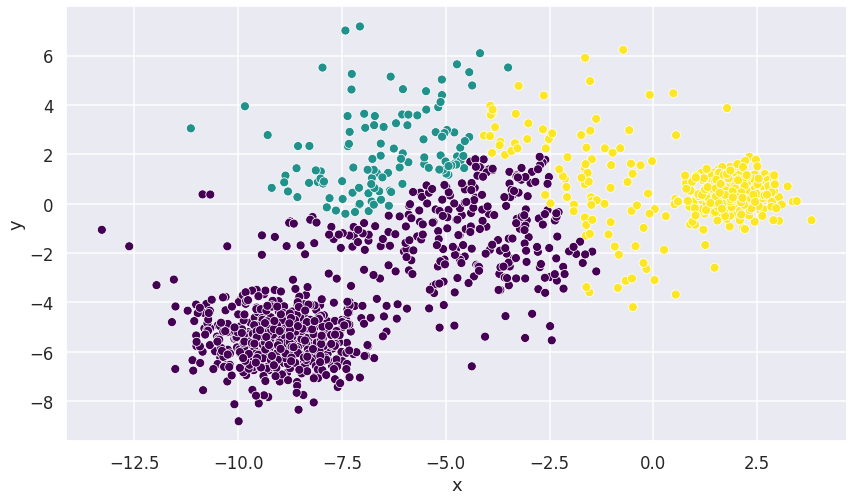

In [8]:
labels = train_and_plot(df, method='complete', threshold=15.0)
print('Clusters:', len(np.unique(labels)))

### Average Linkage

Clusters: 3


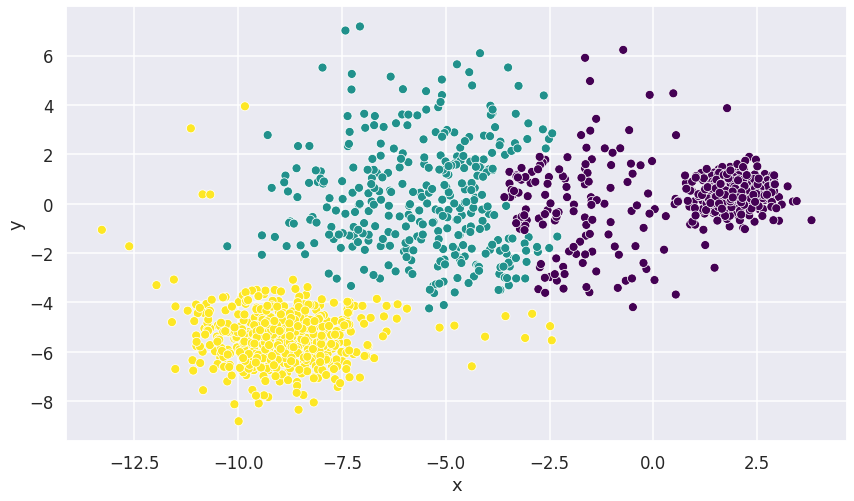

In [9]:
labels = train_and_plot(df, method='average', threshold=6.5)
print('Clusters:', len(np.unique(labels)))

### Ward

Clusters: 3


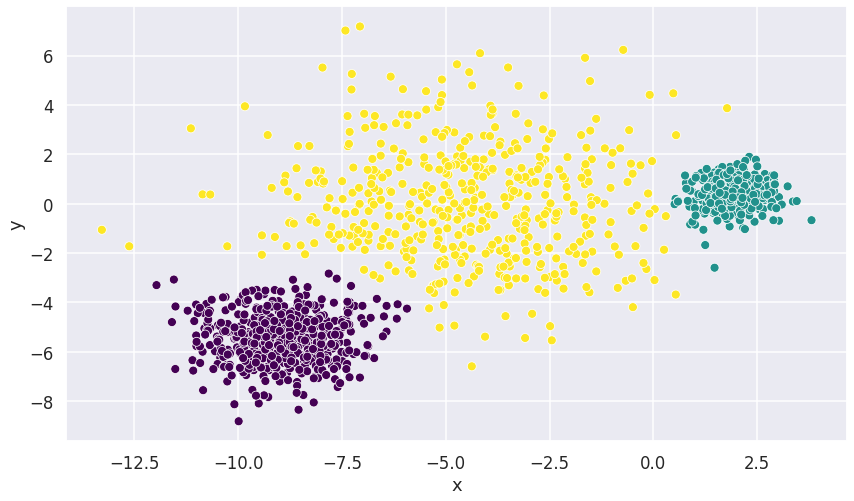

In [10]:
labels = train_and_plot(df, method='ward', threshold=60.0)
print('Clusters:', len(np.unique(labels)))

### Avaliando em bases de dados com formatos diferentes de grupos

In [11]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


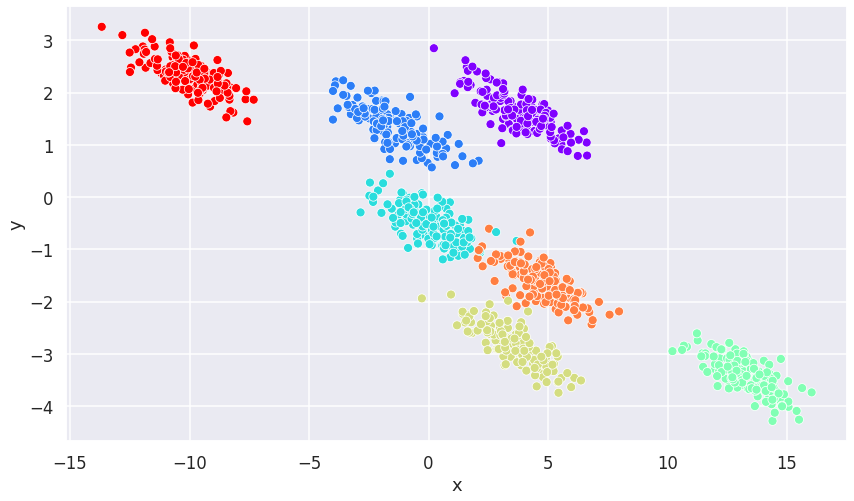

In [12]:
r = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

Clusters: 7


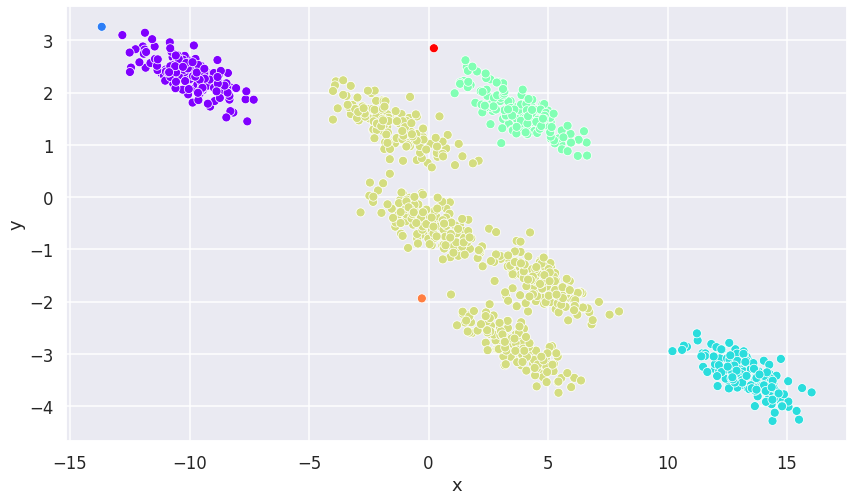

In [13]:
labels = train_and_plot(df_transformed, method='single', threshold=0.6, pallete='rainbow')
print('Clusters:', len(np.unique(labels)))

Clusters: 7


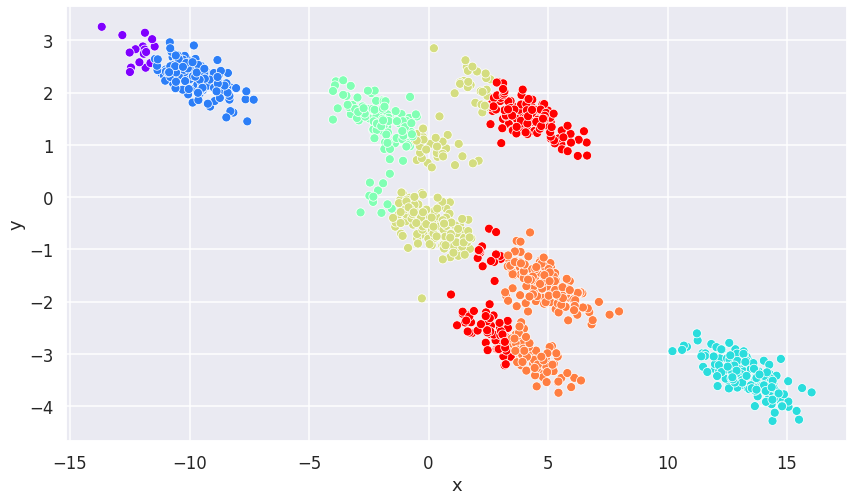

In [14]:
labels = train_and_plot(df_transformed, method='complete', threshold=6.5, pallete='rainbow')
print('Clusters:', len(np.unique(labels)))

Clusters: 7


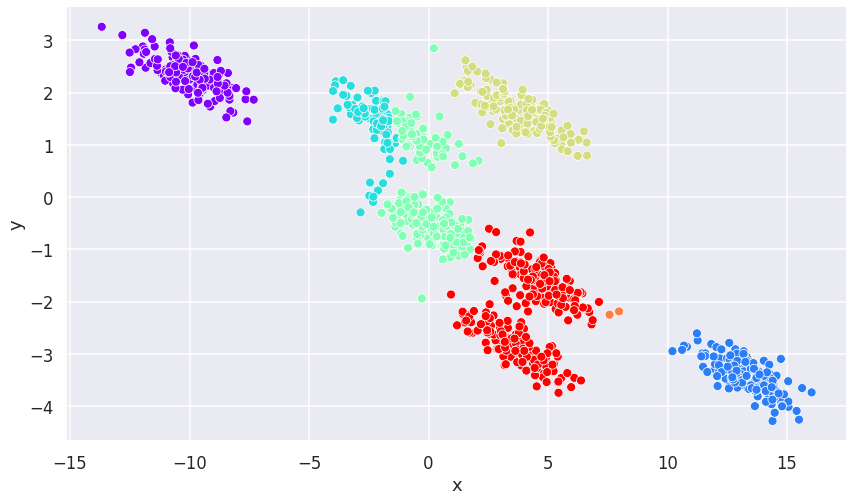

In [15]:
labels = train_and_plot(df_transformed, method='average', threshold=2.7, pallete='rainbow')
print('Clusters:', len(np.unique(labels)))

### Avaliando em bases de dados com formatos diferentes de grupos 2

In [16]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


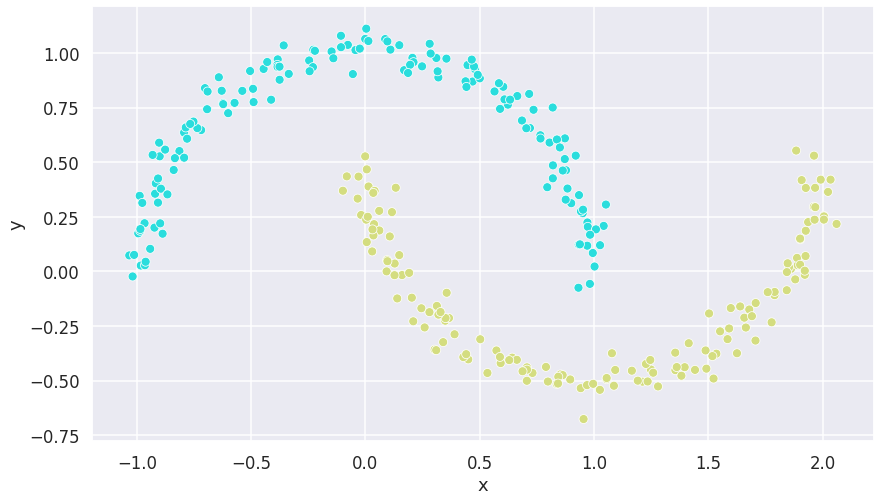

In [17]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

Clusters: 2


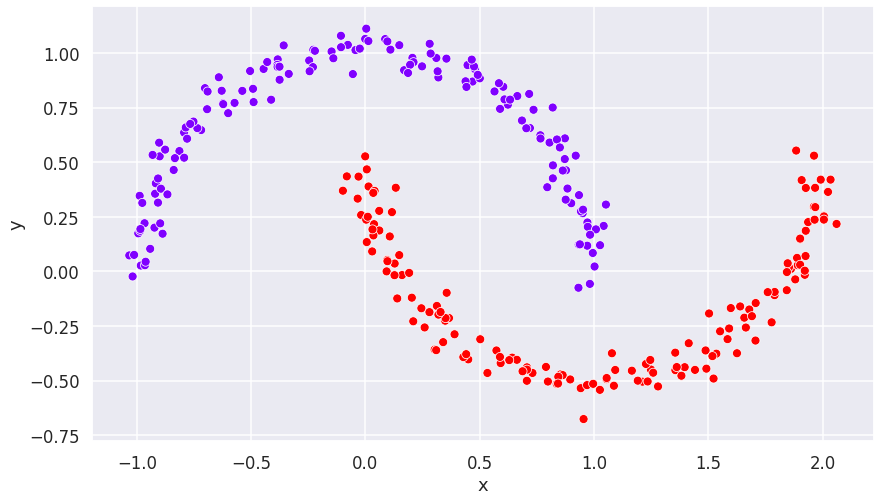

In [18]:
labels = train_and_plot(df_moon, method='single', threshold=0.3, pallete='rainbow')
print('Clusters:', len(np.unique(labels)))